## Common Feature Extraction Techniques

**1. Factor Analysis**
Suppose we have two variables: Income and Education. These variables will potentially have a high correlation as people with a higher education level tend to have significantly higher income, and vice versa.

In the Factor Analysis technique, variables are grouped by their correlations, i.e., all variables in a particular group will have a high correlation among themselves, but a low correlation with variables of other group(s). Here, each group is known as a factor. These factors are small in number as compared to the original dimensions of the data. However, these factors are difficult to observe.

Let’s first read in all the images contained in the train folder:

In [35]:
import pandas as pd
import numpy as np

train = pd.read_csv('mnist.csv')

In [23]:
df = train.iloc[3,1:]
df_x = train.iloc[:,1:]
y = train.iloc[:,0].values


In [25]:
# decompose the dataset using Factor Analysis
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(df_x)

Here, n_components will decide the number of factors in the transformed data. After transforming the data, it’s time to visualize the results:

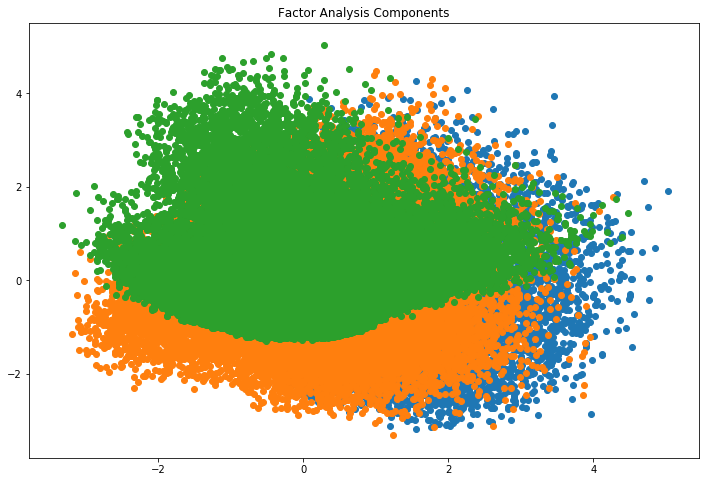

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

We can see all the different factors in the above graph. Here, the x-axis and y-axis represent the values of decomposed factors. As I mentioned earlier, it is hard to observe these factors individually but we have been able to reduce the dimensions of our data successfully.

**2. Singular Value Decomposition**
We can also use Singular Value Decomposition (SVD) to decompose our original dataset into its constituents, resulting in dimensionality reduction.

SVD decomposes the original variables into three constituent matrices. It is essentially used to remove redundant features from the dataset. It uses the concept of Eigenvalues and Eigenvectors to determine those three matrices.

In [33]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df_x)

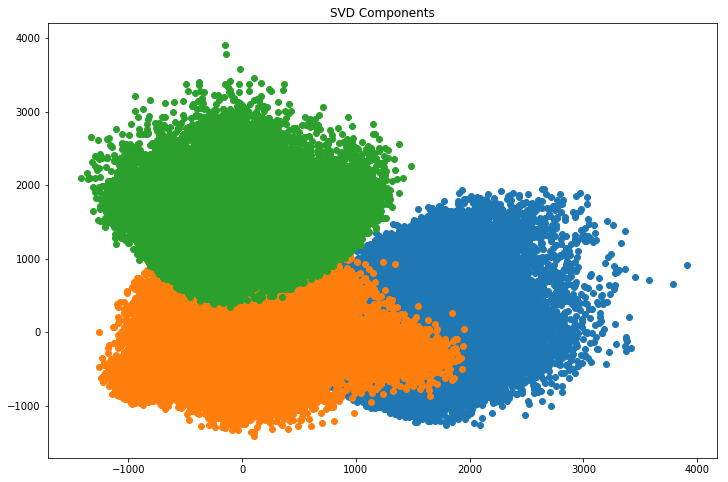

In [34]:
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])

The above scatter plot shows us the decomposed components very neatly. As described earlier, there is not much correlation between these components.

**3. Independent Component Analysis**
Independent Component Analysis (ICA) is based on information-theory and is also one of the most widely used dimensionality reduction techniques. The major difference between PCA and ICA is that PCA looks for uncorrelated factors while ICA looks for independent factors.

If two variables are uncorrelated, it means there is no linear relation between them. If they are independent, it means they are not dependent on other variables. For example, the age of a person is independent of what that person eats, or how much television he/she watches.

This algorithm assumes that the given variables are linear mixtures of some unknown latent variables. It also assumes that these latent variables are mutually independent, i.e., they are not dependent on other variables and hence they are called the independent components of the observed data.

In [36]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X=ICA.fit_transform(df_x)

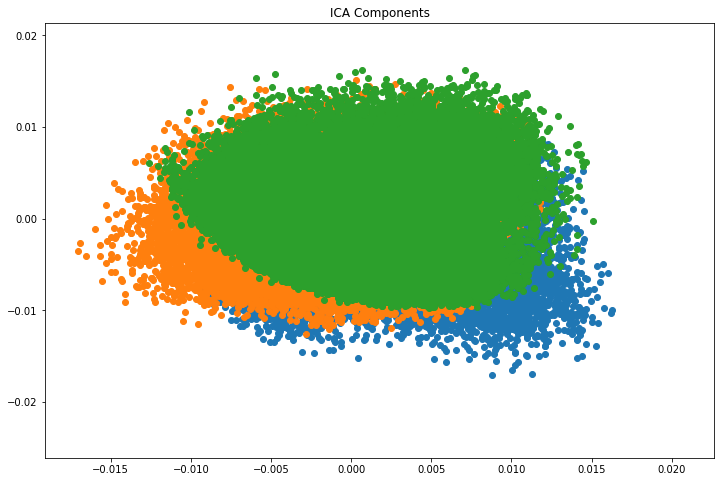

In [37]:
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,1], X[:,2])
plt.scatter(X[:,2], X[:,0])

**4. Isometric Mapping(ISOMAP)**
By projecting one vector onto the other, dimensionality can be reduced. Projections can be done on manifolds. For an n-dimensional curve, small flat pieces are manifolds and a combination of these manifolds will give us the original n-dimensional curve. Let us look at the steps for projection onto manifolds:
* We first look for a manifold that is close to the data
* Then project the data onto that manifold
* Finally for representation, we unfold the manifold
* There are various techniques to get the manifold, and all of these techniques consist of a three-step approach:
    * Collecting information from each data point to construct a graph having data points as vertices
    * Transforming the above generated graph into suitable input for embedding steps
    * Computing an (nXn) eigen equation
    
If a manifold is continuously differentiable to any order, it is known as smooth or differentiable manifold. ISOMAP is an algorithm which aims to recover full low-dimensional representation of a non-linear manifold. It assumes that the manifold is smooth.

It also assumes that for any pair of points on manifold, the geodesic distance (shortest distance between two points on a curved surface) between the two points is equal to the Euclidean distance (shortest distance between two points on a straight line).

We will perform non-linear dimensionality reduction through Isometric Mapping. For visualization, we will only take a subset of our dataset as running it on the entire dataset will require a lot of time.

In [42]:
from sklearn import manifold 
trans_data = manifold.Isomap(n_neighbors=5, n_components=3, n_jobs=-1).fit_transform(df_x[:6000])

Parameters used:

* _n_neighbors_ decides the number of neighbors for each point
* _n_components_ decides the number of coordinates for manifold
* _n_jobs_ = -1 will use all the CPU cores available

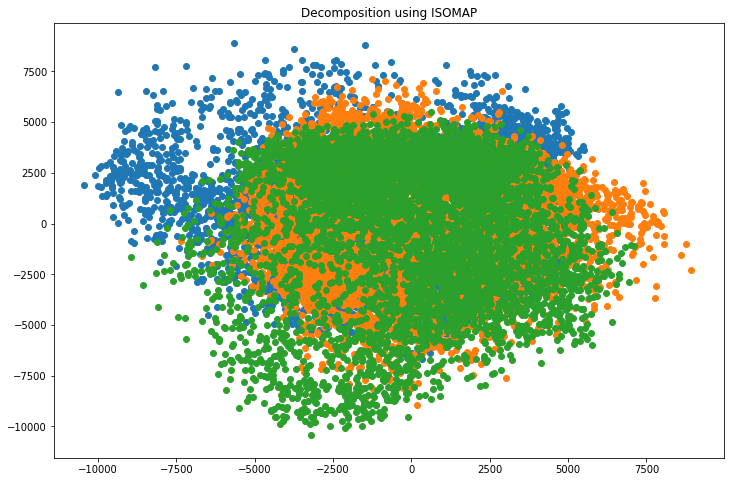

In [43]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using ISOMAP')
plt.scatter(trans_data[:,0], trans_data[:,1])
plt.scatter(trans_data[:,1], trans_data[:,2])
plt.scatter(trans_data[:,2], trans_data[:,0])

You can see above that the correlation between these components is very low. In fact, they are even less correlated as compared to the components we obtained using SVD earlier!

**5. t- Distributed Stochastic Neighbor Embedding (t-SNE)**
So far we have learned that PCA is a good choice for dimensionality reduction and visualization for datasets with a large number of variables. But what if we could use something more advanced? What if we can easily search for patterns in a non-linear way? t-SNE is one such technique. There are mainly two types of approaches we can use to map the data points:

    * Local approaches :  They maps nearby points on the manifold to nearby points in the low dimensional representation.
    * Global approaches : They attempt to preserve geometry at all scales, i.e. mapping nearby points on manifold to nearby points in low dimensional representation as well as far away points to far away points.

* t-SNE is one of the few algorithms which is capable of retaining both local and global structure of the data at the same time
* It calculates the probability similarity of points in high dimensional space as well as in low dimensional space
* After calculating both the probabilities, it minimizes the difference between both the probabilities

In [38]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=3, n_iter=300).fit_transform(df_x[:6000])

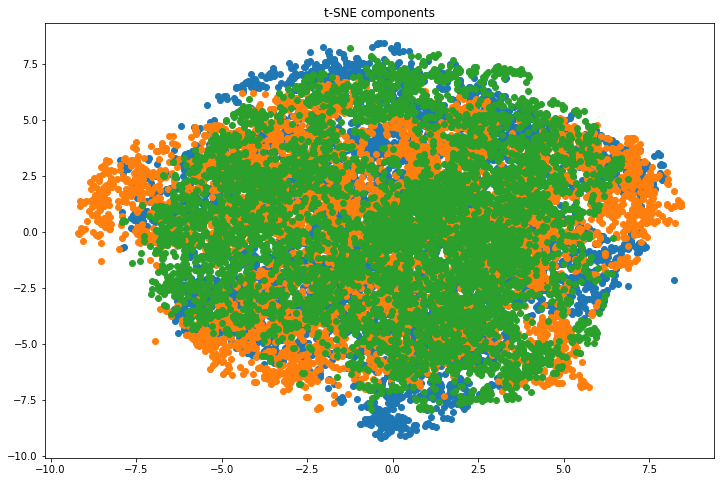

In [39]:
plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(tsne[:,0], tsne[:,1])
plt.scatter(tsne[:,1], tsne[:,2])
plt.scatter(tsne[:,2], tsne[:,0])

Here you can clearly see the different components that have been transformed using the powerful t-SNE technique.

**6. UMAP**
t-SNE works very well on large datasets but it also has it’s limitations, such as loss of large-scale information, slow computation time, and inability to meaningfully represent very large datasets. Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can preserve as much of the local, and more of the global data structure as compared to t-SNE, with a shorter runtime. Sounds intriguing, right?

Some of the key advantages of UMAP are:

* It can handle large datasets and high dimensional data without too much difficulty
* It combines the power of visualization with the ability to reduce the dimensions of the data
* Along with preserving the local structure, it also preserves the global structure of the data. UMAP maps nearby points on the manifold to nearby points in the low dimensional representation, and does the same for far away points

This method uses the concept of k-nearest neighbor and optimizes the results using stochastic gradient descent. It first calculates the distance between the points in high dimensional space, projects them onto the low dimensional space, and calculates the distance between points in this low dimensional space. It then uses Stochastic Gradient Descent to minimize the difference between these distances. To get a more in-depth understanding of how UMAP works, check out [this paper](https://arxiv.org/pdf/1802.03426.pdf).

Refer [here](http://umap-learn.readthedocs.io/en/latest/) to see the documentation and installation guide of UMAP. We will now implement it in Python:

In [40]:
import umap
umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3).fit_transform(df_x[:6000])

Here,

* _n_neighbors determines_ the number of neighboring points used
* _min_dist_ controls how tightly embedding is allowed. Larger values ensure embedded points are more evenly distributed

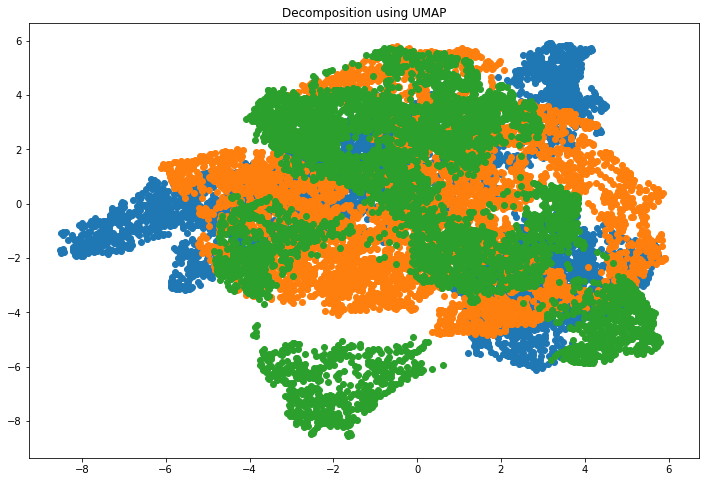

In [41]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP')
plt.scatter(umap_data[:,0], umap_data[:,1])
plt.scatter(umap_data[:,1], umap_data[:,2])
plt.scatter(umap_data[:,2], umap_data[:,0])

The dimensions have been reduced and we can visualize the different transformed components. There is very less correlation between the transformed variables. Let us compare the results from UMAP and t-SNE.

We can see that the correlation between the components obtained from UMAP is quite less as compared to the correlation between the components obtained from t-SNE. Hence, UMAP tends to give better results.

As mentioned in UMAP’s GitHub repository, it often performs better at preserving aspects of the global structure of the data than t-SNE. This means that it can often provide a better “big picture” view of the data as well as preserving local neighbor relations.

ref: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/